In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import tree

# Random Agents 4 main heuristics

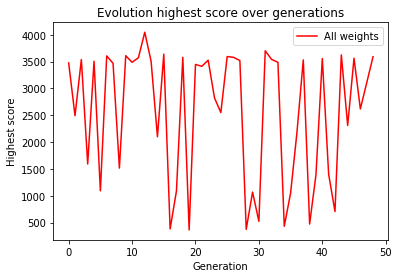

In [4]:
gen_count = 50
highest_score = []
for i in range(1, gen_count):
    df = pd.read_csv(f"../random_agents_4_main_time_800/model_gen_{i}.csv")
    highest_score.append(df["score"].max())
plt.xlabel("Generation")
plt.ylabel("Highest score")
plt.title("Evolution highest score over generations")
plt.plot(highest_score, 'r', label="All weights")
plt.legend()

In [5]:
stacked_df = pd.concat([(pd.read_csv(f"../random_agents_4_main_time_800/model_gen_{i}.csv")) for i in range(1, gen_count+1) ], axis=0)
stacked_df = stacked_df.iloc[:,[0,1,2,3,9]]
stacked_df
stacked_df.corr()["score"]

weight_holes        -0.177540
weight_height       -0.258432
weight_bumpiness    -0.308399
weight_line_clear   -0.003497
score                1.000000
Name: score, dtype: float64

array([0.24940049, 0.24244371, 0.32762376, 0.18053204])

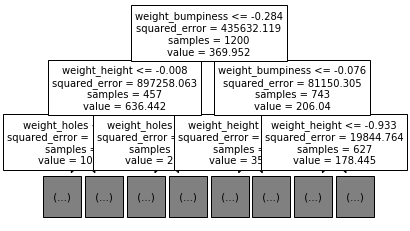

In [6]:
X = stacked_df[["weight_holes", 'weight_height', 'weight_bumpiness', 'weight_line_clear']]
Y = stacked_df['score']
regressor = tree.DecisionTreeRegressor()
regressor.fit(X,Y)
tree.plot_tree(regressor, max_depth=2, fontsize=10, feature_names=regressor.feature_names_in_)
regressor.feature_importances_


# Random Agents All weights heuristics

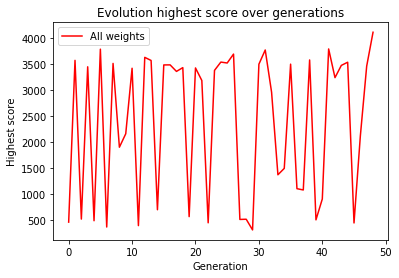

In [7]:
gen_count = 50
highest_score = []
for i in range(1, gen_count):
    df = pd.read_csv(f"../random_agents_4_all_time_800/model_gen_{i}.csv")
    highest_score.append(df["score"].max())
plt.xlabel("Generation")
plt.ylabel("Highest score")
plt.title("Evolution highest score over generations")
plt.plot(highest_score, 'r', label="All weights")
plt.legend()

In [8]:
stacked_df = pd.concat([(pd.read_csv(f"../random_agents_4_all_time_800/model_gen_{i}.csv")) for i in range(1, gen_count+1) ], axis=0)
stacked_df = stacked_df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
stacked_df
stacked_df.corr()["score"]

weight_holes            -0.135957
weight_height           -0.218600
weight_bumpiness        -0.284402
weight_line_clear       -0.014229
weight_hollow_columns   -0.045127
weight_row_transition   -0.112389
weight_col_transition   -0.086559
weight_pit_count        -0.151157
score                    1.000000
Name: score, dtype: float64

array([0.1442466 , 0.184955  , 0.14559668, 0.04197193, 0.01540346,
       0.16074783, 0.08183161, 0.22524689])

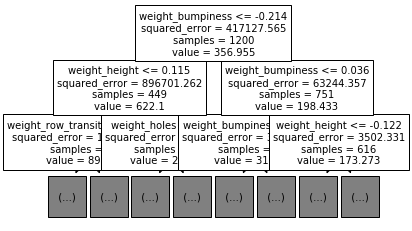

In [12]:
X = stacked_df[["weight_holes", 'weight_height', 'weight_bumpiness', 'weight_line_clear', 'weight_hollow_columns', 'weight_row_transition', 'weight_col_transition', 'weight_pit_count']]
Y = stacked_df['score']
regressor = tree.DecisionTreeRegressor()
regressor.fit(X,Y)
tree.plot_tree(regressor, max_depth=2, fontsize=10, feature_names=regressor.feature_names_in_)
regressor.feature_importances_